## Clasificador de Bayes

### Alexander Villatoro 1182118
### Andres Galvez 1024718
### Sergio Lara 1044418
### Luis Chutá 1320016

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
from sklearn.preprocessing import LabelEncoder
import os
import pyodbc 

In [21]:

conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=localhost;DATABASE=RepuestosWeb;Trusted_Connection=yes;')

query = "select * from VW_OrdenesEncimaPromedio ;"
df = pd.read_sql(query, conn)
print(df.head(26))

      NombreCiudad Genero                ID_Parte  ID_Categoria  Total_Orden  \
0        San Diego      M  AC1100173CORE-ORIG.REC          1612     23139.50   
1           Tacoma      F      AC1320108-ORIG.REC          2827      1041.55   
2            Akron      M      AC1228119-ORIG.REC          3154      6207.45   
3         Richmond      M               AC1217107          3225     13022.11   
4           Dallas      F      AC2519105-ORIG.REC          4241      2145.25   
5       Shreveport      F      AC1100177-ORIG.REC          2512     14485.40   
6           Fresno      M              AC1114104C          2560      1950.12   
7           Boston      F               AC1249128          3847      5526.56   
8       Louisville      F               AC1228103          2598      6327.91   
9        St. Louis      M     AC1115103C-ORIG.REC          2746      8611.97   
10  St. Petersburg      M               AC1323113          3836     23412.15   
11         Lubbock      F               

In [19]:
df.drop('ID_Parte',axis=1,inplace=True)
df.drop('ID_Categoria',axis=1,inplace=True)
df.drop('Total_Orden',axis=1,inplace=True)

In [20]:
df

,NombreCiudad,Genero,TotalEncimaPromedio
0,San Diego,M,1
1,Tacoma,F,0
2,Akron,M,0
3,Richmond,M,1
4,Dallas,F,0
...,...,...,...
11902,Denver,F,0
11903,Buffalo,M,1
11904,Tacoma,M,1
11905,Bakersfield,F,1


In [5]:
#Almacenar las variables X y Y por separado
X = df.iloc[:, 0:2].values
y = df.iloc[:, -1].values
X

array([['San Diego', 'M'],
       ['Tacoma', 'F'],
       ['Akron', 'M'],
       ...,
       ['Tacoma', 'M'],
       ['Bakersfield', 'F'],
       ['Greensboro', 'F']], dtype=object)

In [6]:
#Con Enconder podremos codificar atributos no numericos segun una escala

le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
X[:,1] = le.fit_transform(X[:,1])
X

array([[76, 1],
       [87, 0],
       [0, 1],
       ...,
       [87, 1],
       [8, 0],
       [34, 0]], dtype=object)

In [7]:
#Uscamos scikit learn para llamar a la funcion split dividiendo 80/20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [8]:
#creamos el modelo de NB
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [9]:
#Predecimos la variable dependiente usando las variables indepndientes del 20%
y_pred  =  classifier.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [10]:
#Vemos los valores reales de Y en el 20%
y_test

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [11]:
#generamos matriz de confusion y precision
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [12]:
#Confusion matrix
cm

array([[208, 993],
       [223, 958]], dtype=int64)

In [13]:
#Accuracy
ac

0.489504617968094

In [14]:
import seaborn as sns

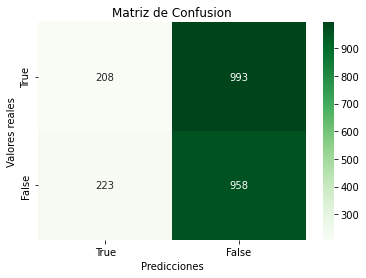

In [15]:
#ploteamos matriz de confusion
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Greens');  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicciones');ax.set_ylabel('Valores reales'); 
ax.set_title('Matriz de Confusion'); 
ax.xaxis.set_ticklabels(['True', 'False']); ax.yaxis.set_ticklabels(['True', 'False']);

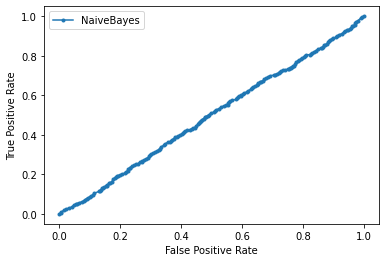

0.4957257605678586


In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
naiveProb = roc_auc_score(y_test, lr_probs)
prueba1,prueba2,_ = roc_curve(y_test, lr_probs)
pyplot.plot(prueba1, prueba2, marker='.', label='NaiveBayes')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
print(naiveProb)